# Project:The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description


This data set contains information about 10,866 movies collected from The Movie Database(TMDb), and these are the columns in the dataset id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj. 

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

#### Question

Question
1. Which year has the highest release of movies?
2. Which Genre Has The Highest Release Of Movies?.
3. Which length movies most liked by the audiences according to their popularity?
4. Most frequent actor?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Having importing the packages that will be needed I read the csv file 'TMDB-MOVIES'  and I viewed the first 5 rows to see what the datasets look like.

In [10]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

On checking the dataset and drafting my questions out it's necessary to clean and remove unwanted data so we can be left with the relevant data for my analysis.
## General Properties

Looking at the dataset we can see the top 5 rows and judging by this the dataset looks clean whereas it's not so we will be checking for the tail in the next line.

In [12]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From the look of it I can see the bottom 5 rows and some columns that consist of 0 and null values.

In [13]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


The dataset consist of a range for each column showing the statistics.

In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


For data quality there's a need to check for the data type of the dataset.

In [18]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

This is showing the summary of our dataset calculating the total columns and rows, showing the rows that consist of null values.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

After noticing the huge amount of null values in some columns there's need to calculate the sum of null values in each column,
9 columns consists of null values which are imdb_id,cast,homepage,director,tagline,keywords,overview,genre and production_companies.

In [37]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [116]:
df.fillna(0)
print()

We fill the null values with 0


### Data Cleaning (Removing Irrelevant Data )

### Modification of Dataset

1. Remove dupliate rows.
2. Replace date format of release_date with datetime.
3. Dropping irrelevant columns that are not needed.
4. Remove movies with 0 value for budget and revenue.

We have to sum up the duplicate first to know the total duplicates we have.

**Remove Duplicate**
> We have just 1 duplicate and now that we know our duplicate we can go ahead to drop it.

In [41]:
sum(df.duplicated())

1

In [42]:
df.drop_duplicates(inplace=True)

Let's go ahead to confirm if the row has been dropped by checking the shape.

In [43]:
df.shape

(10865, 21)

We can see that the row has been dropped we had 10,866 rows before which is now 10,865.

 **Changing Date Format**

In [44]:
df['release_date']= pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

 The date format was in string format so we need to change it to datetime format.

 **Dropping Irrelevant columns**
>  After performing the cleaning steps and discussing the structures of the data there's a need to drop the irrelevant columns in the dataset having 21 columns in total.


In [45]:
df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'], axis = 1, inplace=True)

> Let's confirm if the columns has been dropped.

In [46]:
df.shape

(10865, 15)

> After removing unused columns we are left with 15 columns for our analysis.

**Remove movies with 0 or inappropriate value for budget and revenue**
> In this dataset we can see from the analysis that there are some movies  variables which values was not recorded and this  gives reasons for the 0 values,so as not to get an incorrect result calculating the profits of these variables there's a need to eradicate them which has been done during the cleaning phase. This might be due to lack of information or unreleased movies.

In [47]:
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])


Rows With Zero Values In The Budget Column: 5696


In [48]:
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])


Rows With Zero Values In The Revenue Column: 6016


> We can go ahead to investigate the data now that we have the precise dataset we need to answer the questions above.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Which year has the highest release of movies?

In [49]:
# we are going to be grouping the year and count the number of movies in each year
data= df.groupby('release_year').count()['id']

In [51]:
print (data.tail())

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


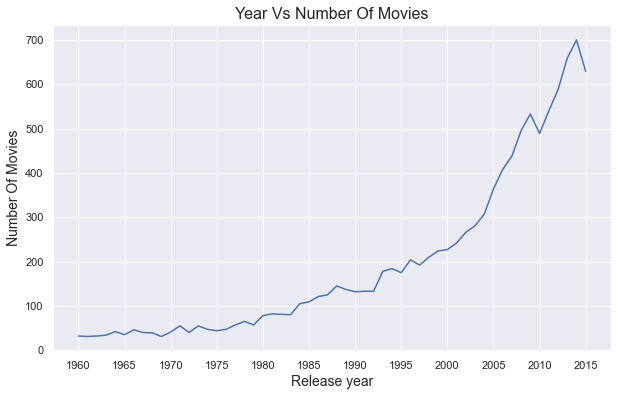

In [69]:
# Another grouping is going to be done here by year and total count of movies in each year and we're plotting.

df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

# Setting the figure size and labels.

sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 16)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14)

#set the style sheet

sns.set_style("darkgrid")


> Upon the outcome of the graph and analysis we can say 2014 has the highest release of movies (700), 2013 with (659) and 2015 with (629)

### Research Question 2  : Which Genre Has The Highest Release Of Movies?.

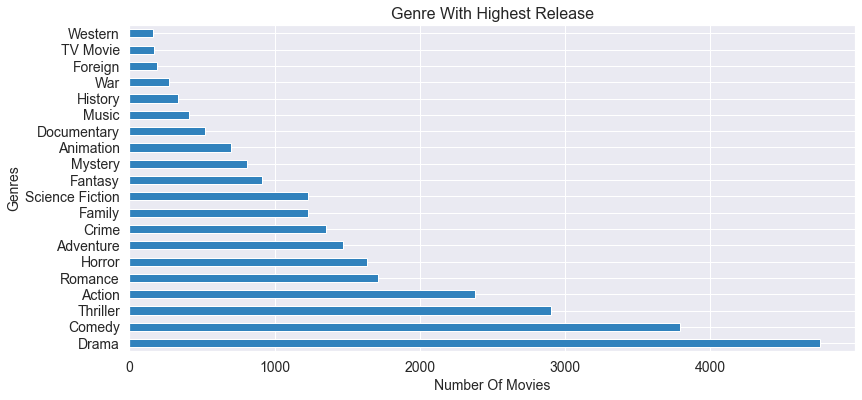

In [79]:
#  A function is made to split the string and return the count of each genre.
def count_genre(x):
    # concatenate all the rows of the genre.
    
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    
    # counts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

# call the function for counting the movies of each genre.

total_genre_movies = count_genre('genres')

#plot a 'barh' plot using plot function for 'genre vs number of movies'.

total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=14,colormap='tab20c')

# Titles and labels of the plot 
plt.title("Genre With Highest Release",fontsize=16)
plt.xlabel('Number Of Movies',fontsize=14)
plt.ylabel("Genres",fontsize= 14)
sns.set_style("whitegrid")

> Judging from the graph we can see that Drama genre has the highes release of movies followed by Comedy and Thriller.

### Research Question 3 : Which length movies most liked by the audiences according to their popularity?

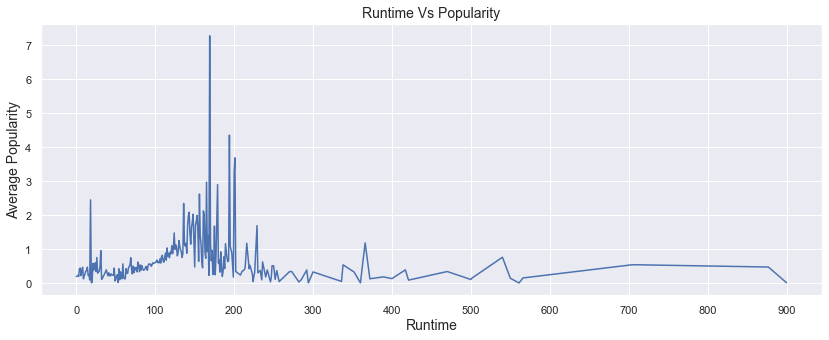

In [100]:
# We will be using groupby to group the data according to their runtime.

# Using their popularity the most popular length movies was found.

# make the group of the data according to their runtime and find the mean popularity related to this and plot.
df.groupby('runtime')['popularity'].mean().plot(figsize = (14,5),xticks=np.arange(0,1000,100))

# We will be setting the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

# We will be setting up  the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 14)
plt.ylabel('Average Popularity',fontsize = 14)

# We will be setting up the figure size.

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")

> Based on the graph analysis the movies that range from 100 to 200 runtime are more popular than movies with longer runtime because long duration movies gets tiring and boring.

In [96]:
dd

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


### Research Question 4 : Most frequent actor?

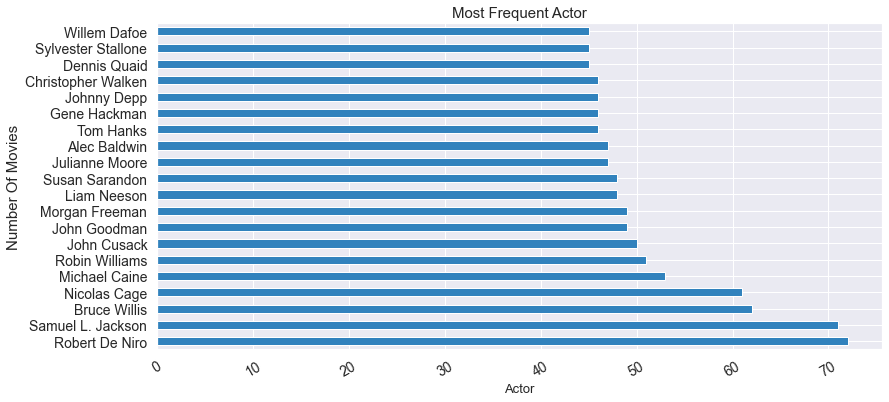

In [114]:
# The count_genre function is used to calculate the number of movies done by each actors.
count_actor_flims = count_genre('cast')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.barh(figsize=(13,6),colormap= 'tab20c',fontsize=14)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 30)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 15)
sns.set_style("darkgrid")

<a id='conclusions'></a>
## Conclusions

>
- Out of the genre we have drama as the most popular followed by action,comedy and thriller.
- 2014 has the maximum number of movies released. 
- Robert De Niro is the most frequent actor followed by Samuel L.Jackson
- Movies ranging from 100-200 runtime are more popular than movies with longer runtime.

>**Limitations**
- While cleaning the dataset some columns were dropped because they were not significant to the analysis.